In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [35]:
X, y = make_blobs(centers=2, random_state=0)

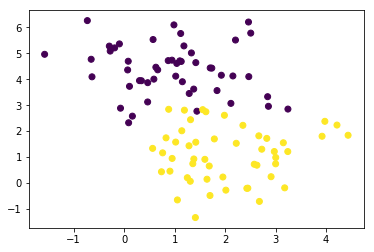

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [37]:
X.shape

(100, 2)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
model.coef_

array([[ 0.97342214, -1.52164052]])

In [42]:
model.intercept_

array([2.33094357])

In [43]:
class CustomLogisticReg:
    
    def __init__(self, lr=.1, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        for i in range(self.max_iters):
            self.gradient_accend(X, y)
    
    def gradient_accend(self, X, y):
        delta_theta = self.gradient(X, y)
        self.theta_ += delta_theta
        
    def gradient(self, X, y):
        yh = self.hypothesis(X)
        ya = y.reshape(-1, 1)
        diff = (yh - ya)
        
        dll2theta = np.dot(X.T, diff) / len(X)
        return -dll2theta*self.lr
    
    def hypothesis(self, X):
        g = np.dot(X, self.theta_)
        return 1/(1 + np.exp(-g))

In [44]:
model = CustomLogisticReg(lr=.1, max_iters=100)

In [45]:
model.fit(X, y)

In [46]:
c, m1, m2 = model.theta_

In [47]:
x1 = np.linspace(-10, 10, 100)

In [48]:
x2 = -(x1*m1)/m2 - c/m2

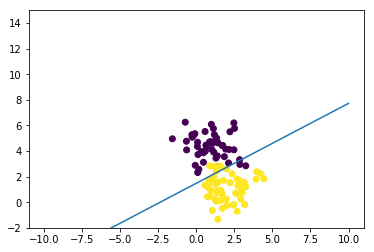

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylim(-2, 15)
plt.plot(x1, x2)